In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

In [2]:
# reading csv file
df = pd.read_csv('../dataset/crops_final.csv')

In [3]:
# converting from pandas dataframe to numpy
np_inputs = df.to_numpy()

In [4]:
# inputs are from col-6 to col-13
inputs = np_inputs[:, 6:14]
inputs = np.array(inputs, dtype='float32')

print(inputs)


# convert output crops to binary encoded labels
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(np_inputs[:,14])
outputs = lb.transform(np_inputs[:,14])

outputs = np.array(outputs, dtype='float32')

print(outputs)

[[33.259373   7.030931  60.84086   ... 15.602418   6.7222724 10.1207695]
 [33.324234   6.562556  64.75895   ... 16.013498   6.084758  11.4723835]
 [33.736282   6.557421  61.573425  ... 16.430769   5.703082  11.680659 ]
 ...
 [25.8816     6.181125  30.692217  ... 53.876553  23.047926  12.743419 ]
 [24.774702   6.929148  58.6065    ... 47.295223  24.395452  11.042995 ]
 [23.613468   6.6437187 53.63108   ... 54.34586   26.842375  13.102743 ]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [5]:
# converting numpy array into torch tensors
inputs = torch.from_numpy(inputs)
outputs = torch.from_numpy(outputs)

print(inputs)
print(outputs)

tensor([[33.2594,  7.0309, 60.8409,  ..., 15.6024,  6.7223, 10.1208],
        [33.3242,  6.5626, 64.7589,  ..., 16.0135,  6.0848, 11.4724],
        [33.7363,  6.5574, 61.5734,  ..., 16.4308,  5.7031, 11.6807],
        ...,
        [25.8816,  6.1811, 30.6922,  ..., 53.8766, 23.0479, 12.7434],
        [24.7747,  6.9291, 58.6065,  ..., 47.2952, 24.3955, 11.0430],
        [23.6135,  6.6437, 53.6311,  ..., 54.3459, 26.8424, 13.1027]])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [6]:
from torch.utils.data import TensorDataset

In [7]:
ds = TensorDataset(inputs,outputs)
print(len(ds))
print(ds[0:3])

121081
(tensor([[33.2594,  7.0309, 60.8409, 32.7850, 37.2703, 15.6024,  6.7223, 10.1208],
        [33.3242,  6.5626, 64.7589, 29.3024, 36.9567, 16.0135,  6.0848, 11.4724],
        [33.7363,  6.5574, 61.5734, 29.1465, 36.2751, 16.4308,  5.7031, 11.6807]]), tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))


In [8]:
from torch.utils.data import random_split

In [9]:
train_ds, valid_ds = random_split(ds, [96865, 24216])
len(train_ds), len(valid_ds)

(96865, 24216)

In [10]:
from torch.utils.data import DataLoader

In [11]:
batch_size = 64
train_loader = DataLoader(train_ds , batch_size , shuffle=True )
val_loader = DataLoader(valid_ds , batch_size)
print(len(train_loader))

1514


In [12]:
from torch import nn

# defining neural network parameteres
input_nodes = 8
hidden1_nodes = 64
hidden2_nodes = 64
output_nodes = 29

# creating neural net
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(input_nodes, hidden1_nodes)
        self.hidden1 = nn.Linear(hidden1_nodes, hidden2_nodes)
        self.hidden2 = nn.Linear(hidden2_nodes, output_nodes)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.input(x)
        x = self.relu(x)
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.softmax(x)

        return x

In [13]:
model = Model()
list(model.parameters())

[Parameter containing:
 tensor([[-0.3240, -0.3149,  0.2502, -0.0680, -0.1624, -0.1805,  0.0922,  0.2043],
         [ 0.3253,  0.1093, -0.1586,  0.2853, -0.2684,  0.2492, -0.3181,  0.2410],
         [-0.1625,  0.2717,  0.0437, -0.2144,  0.2371,  0.2287, -0.2917,  0.2572],
         [-0.2423, -0.2979,  0.2416, -0.0577,  0.0555,  0.1063,  0.0841, -0.3224],
         [-0.1589, -0.1051, -0.1374, -0.2988,  0.2353, -0.0671, -0.2655, -0.1007],
         [ 0.3374, -0.2397, -0.1125,  0.1530, -0.3396, -0.3357,  0.3272, -0.0732],
         [-0.2689, -0.2072, -0.1661,  0.3017,  0.1831,  0.2527,  0.0989,  0.1099],
         [ 0.0433, -0.2259,  0.0953,  0.3033,  0.0829, -0.0514, -0.3207,  0.0966],
         [ 0.1781,  0.3031,  0.0927,  0.0972, -0.2115, -0.1252, -0.2501, -0.1693],
         [ 0.0158, -0.0248,  0.0341,  0.2014, -0.0654, -0.2094,  0.0470,  0.0081],
         [ 0.2072,  0.2746, -0.1054, -0.1032, -0.0956,  0.3527,  0.0538, -0.2365],
         [ 0.3092, -0.2291, -0.1198,  0.1638,  0.1471,  0.1577, 

In [14]:
import torch.nn.functional as F

loss_dict={}
def train(model,epochs,train_batch,valid_batch,lr,opt_fn=torch.optim.SGD):
    opt = opt_fn(model.parameters(), lr)
    for epoch in range(epochs):
        loss_dict[epoch] = 0
        i = 0
        for input_part, output_part in train_batch:
            i+=1
            output = model(input_part)
            loss = F.mse_loss(output,output_part)
            loss_dict[epoch]+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
            #print("Done with {0} part of {1}/{2}".format(i,epoch,epochs))
        loss_dict[epoch]/1514
        print("For epoch {0} avg_loss = {1}".format(epoch,loss_dict[epoch]))
    return loss_dict

In [15]:
epochs = 60
lr = 1e-2

history = train(model, epochs, train_loader, val_loader, lr)

For epoch 0 avg_loss = 50.389747619628906
For epoch 1 avg_loss = 45.81378173828125
For epoch 2 avg_loss = 42.0672721862793
For epoch 3 avg_loss = 37.93685531616211
For epoch 4 avg_loss = 35.203330993652344
For epoch 5 avg_loss = 32.989620208740234
For epoch 6 avg_loss = 31.245086669921875
For epoch 7 avg_loss = 29.065706253051758
For epoch 8 avg_loss = 26.569211959838867
For epoch 9 avg_loss = 24.808650970458984
For epoch 10 avg_loss = 23.449010848999023
For epoch 11 avg_loss = 22.376672744750977
For epoch 12 avg_loss = 21.4033145904541
For epoch 13 avg_loss = 20.577421188354492
For epoch 14 avg_loss = 19.9847469329834
For epoch 15 avg_loss = 19.574384689331055
For epoch 16 avg_loss = 19.252090454101562
For epoch 17 avg_loss = 18.93763542175293
For epoch 18 avg_loss = 18.742631912231445
For epoch 19 avg_loss = 18.581336975097656
For epoch 20 avg_loss = 18.44355010986328
For epoch 21 avg_loss = 18.316221237182617
For epoch 22 avg_loss = 18.182170867919922
For epoch 23 avg_loss = 18.0247

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

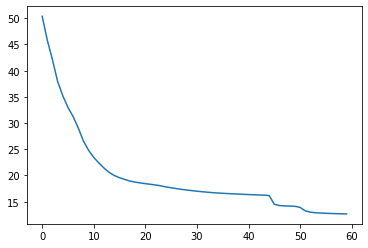

In [17]:
plt.plot(list(loss_dict.keys()), list(loss_dict.values()))
plt.show()

In [18]:
torch.save(model.state_dict(), 'crop_prediction_weights_2.pth')

In [19]:
model.state_dict()

OrderedDict([('input.weight',
              tensor([[-3.2542e-01, -3.1018e-01,  3.3977e-01, -3.2862e-02, -1.9732e-01,
                       -1.1428e-01,  1.1619e-01,  2.8608e-01],
                      [ 3.5996e-01,  1.3895e-01, -1.4563e-01,  3.6921e-01, -2.2927e-01,
                        2.1933e-01, -4.0005e-01,  2.4126e-01],
                      [-1.8391e-01,  2.8096e-01,  1.1709e-02, -2.3658e-01,  2.7456e-01,
                        2.9811e-01, -3.5366e-01,  3.1016e-01],
                      [-2.3667e-01, -3.0875e-01,  2.5648e-01, -1.0824e-01,  1.2827e-01,
                        1.4139e-01,  4.6707e-02, -4.7841e-01],
                      [-1.5888e-01, -1.0514e-01, -1.3736e-01, -2.9876e-01,  2.3532e-01,
                       -6.7131e-02, -2.6553e-01, -1.0066e-01],
                      [ 3.5511e-01, -2.3496e-01, -1.0138e-01,  1.6755e-01, -3.3340e-01,
                       -3.3512e-01,  3.2877e-01, -7.0164e-02],
                      [-1.8500e-01, -1.8730e-01, -1.0319e-01,  3

In [20]:
model2 = Model()
model2.load_state_dict(torch.load('crop_prediction_weights.pth'))
model2.state_dict()

OrderedDict([('input.weight',
              tensor([[ 1.4240e-01,  3.0208e-01,  3.3952e-01,  4.0957e-01, -2.1840e-01,
                        7.7345e-02, -1.1007e-01, -6.7018e-02],
                      [-1.6411e-01, -3.2685e-01, -3.2188e-02, -1.7808e-01,  2.6823e-01,
                       -2.3882e-01,  1.7069e-01,  2.4261e-01],
                      [-2.9862e-01,  1.3380e-01,  3.0032e-01,  8.4978e-02, -1.1280e-01,
                        3.9817e-01,  3.1366e-01, -8.1339e-02],
                      [-3.3819e-01, -7.2151e-02,  2.0203e-01, -3.1742e-01,  1.6309e-01,
                       -3.4058e-01,  2.2519e-01,  2.2271e-01],
                      [-1.3653e-01,  3.2881e-01, -2.8039e-01, -7.7726e-02, -1.7620e-01,
                        7.9638e-02,  2.9207e-01, -2.4837e-01],
                      [-2.6533e-01, -2.8714e-01,  2.9645e-02,  2.8596e-01,  2.1628e-01,
                        2.1521e-01,  2.7535e-01, -3.3423e-01],
                      [ 2.9354e-01, -1.7299e-01, -2.2842e-01,  1

In [25]:
crops = ['arhar', 'bajra', 'barley', 'coriander', 'cotton', 'cowpea', 'dry chillies', 'garlic', 'ginger', 'gram', 'groundnut', 'jowar', 'linseed', 'maize-k', 'maize-r', 'masoor', 'moong', 'onion', 'peas&beans', 'potato', 'ragi', 'rapeseed', 'rice', 'safflower', 'sugarcane', 'sunflower', 'turmeric', 'urad', 'wheat']


pred_user = model2(torch.from_numpy(np.array([[20, 7.4, 78, 23, 28, 15, 18, 5]], dtype='float32')))
print(pred_user)

greater_than_zero={}
index = -1

for i in pred_user:
    for p in i:
        index+=1
        if(p > 0):
            greater_than_zero[crops[index]] = p 
    for i in greater_than_zero:
        print("Crop:- {0}  Probab:- {1}".format(i,greater_than_zero[i]*100))

tensor([[1.1137e-03, 1.0728e-04, 4.4431e-06, 9.9732e-07, 3.2659e-02, 1.3428e-02,
         3.3147e-01, 1.3052e-03, 2.6530e-04, 3.1458e-04, 9.3813e-04, 2.3722e-02,
         2.4871e-01, 1.7424e-02, 5.0516e-04, 1.7932e-02, 1.7657e-03, 5.1582e-07,
         1.3871e-01, 5.3930e-02, 1.2608e-05, 7.1804e-07, 4.4971e-03, 7.4200e-02,
         5.7790e-04, 3.1376e-03, 1.7156e-06, 3.3251e-02, 1.7217e-05]],
       grad_fn=<SoftmaxBackward>)
Crop:- arhar  Probab:- 0.11136536300182343
Crop:- bajra  Probab:- 0.010728138498961926
Crop:- barley  Probab:- 0.00044431290007196367
Crop:- coriander  Probab:- 9.973191481549293e-05
Crop:- cotton  Probab:- 3.265881061553955
Crop:- cowpea  Probab:- 1.342787742614746
Crop:- dry chillies  Probab:- 33.14677047729492
Crop:- garlic  Probab:- 0.13052260875701904
Crop:- ginger  Probab:- 0.0265301875770092
Crop:- gram  Probab:- 0.031458210200071335
Crop:- groundnut  Probab:- 0.09381312131881714
Crop:- jowar  Probab:- 2.3722035884857178
Crop:- linseed  Probab:- 24.871213912